## Import dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

import warnings
warnings.filterwarnings("ignore")

## Read data

In [4]:
df_AL = pd.read_csv("../data/amide_AL_set.csv")
df_EL = pd.read_csv("../data/enol_EL_set.csv")

In [5]:
non_features = ['ligand_entry', 'SMILES_FL', 'ligand_type', 'exp_yield', 'exp_ee', 'exp_deldelG']  # non-features

In [6]:
X_AL = df_AL.drop(columns = non_features) # storing features
y_AL = df_AL['exp_deldelG'] # storing label

X_EL = df_EL.drop(columns = non_features)
y_EL = df_EL['exp_deldelG'] 

In [7]:
X_AL.shape

(9, 36)

In [8]:
X_EL.shape

(11, 36)

## Feature: Correlation analysis

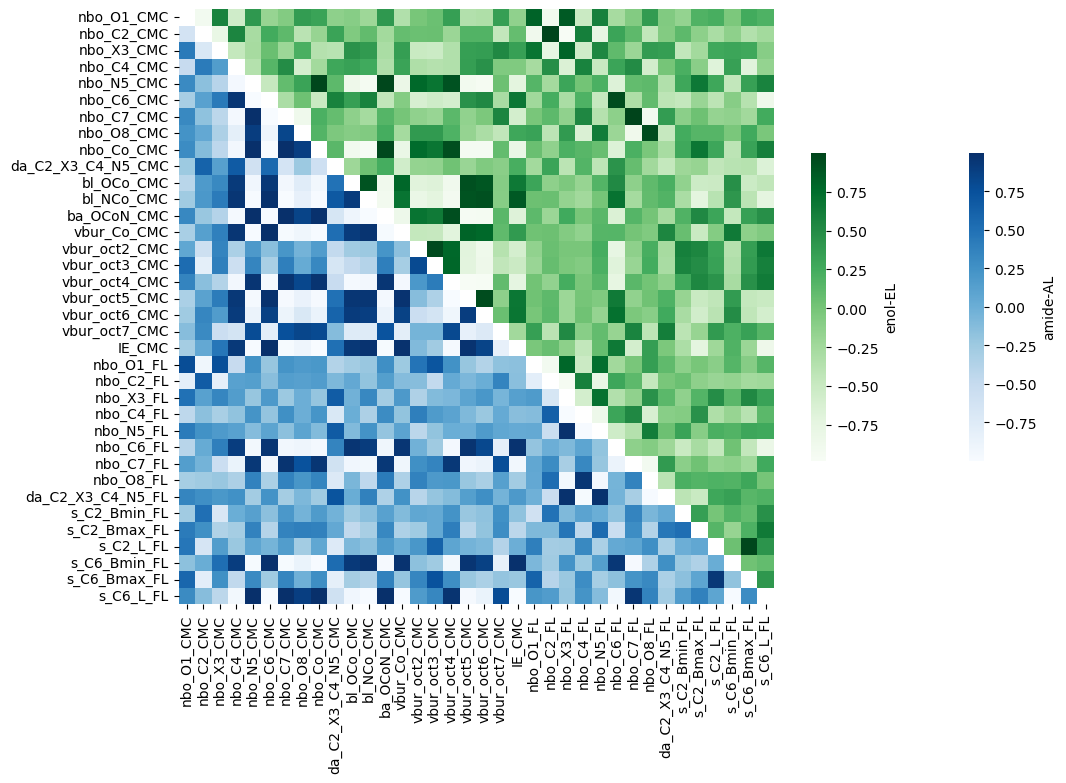

In [10]:
plt.figure(figsize=(12, 8))

corr_AL = X_AL.corr(numeric_only=True)  # for amide ligands
corr_EL = X_EL.corr(numeric_only=True)  # for enol ligands

# combined pot for AL and EL set 
sns.heatmap(corr_AL, mask=np.triu(np.ones_like(corr_AL, dtype=bool)), cmap="Blues", annot=False, square=True, cbar_kws={"shrink": 0.5, "label": "amide-AL"})
sns.heatmap(corr_EL, mask=np.tril(np.ones_like(corr_EL, dtype=bool)), cmap="Greens", annot=False, square=True, cbar_kws={"shrink": 0.5, "label": "enol-EL"})

plt.savefig('combined_heatmap_AL_EL.png', dpi=300, bbox_inches='tight')

plt.show()

## Feature: Box-plot analysis

In [12]:
df_combined = pd.concat([df_AL, df_EL], axis=0, ignore_index=True)

In [13]:
# common box-plot parameters
boxplot_palette=["#6CB4EE", "#72BF6A"]
boxplot_props = {
    'boxprops': {'edgecolor': 'k'},
    'whiskerprops': {'color': 'k'},
    'capprops': {'color': 'k'},
    'medianprops': {'color': 'k'},
    'flierprops': {'markeredgecolor': 'k'}
}

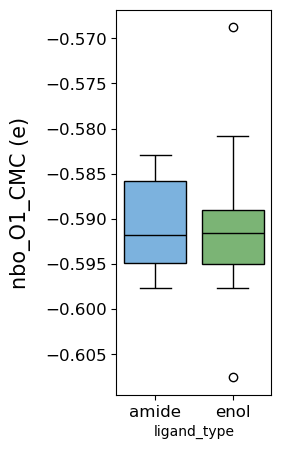

In [14]:
plt.figure(figsize=(2, 5))

sns.boxplot(x='ligand_type', y='nbo_O1_CMC', data=df_combined, palette=boxplot_palette, linewidth=1, **boxplot_props)

plt.ylabel('nbo_O1_CMC (e)', fontsize=15, labelpad=10)
# plt.xlabel('ligand_type')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.savefig('bxplt_nbo_O1_CMC.png', dpi=300, bbox_inches='tight')

plt.show()

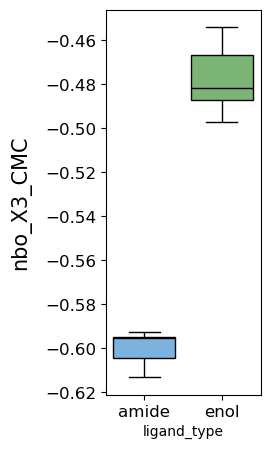

In [15]:
plt.figure(figsize=(2, 5))

sns.boxplot(x='ligand_type', y='nbo_X3_CMC', data=df_combined, palette=boxplot_palette, linewidth=1, **boxplot_props)

plt.ylabel('nbo_X3_CMC', fontsize=15, labelpad=10)
# plt.xlabel('ligand_type')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.savefig('bxplt_nbo_X3_CMC.png', dpi=300, bbox_inches='tight')

plt.show()

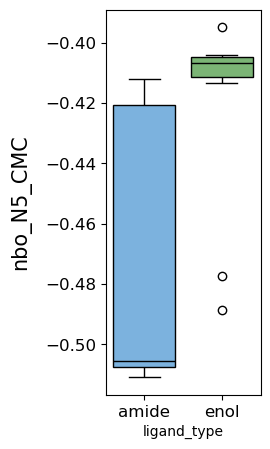

In [16]:
plt.figure(figsize=(2, 5))

sns.boxplot(x='ligand_type', y='nbo_N5_CMC', data=df_combined, palette=boxplot_palette, linewidth=1, **boxplot_props)

plt.ylabel('nbo_N5_CMC', fontsize=15, labelpad=10)
# plt.xlabel('ligand_type')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.savefig('bxplt_nbo_N5_CMC.png', dpi=300, bbox_inches='tight')

plt.show()

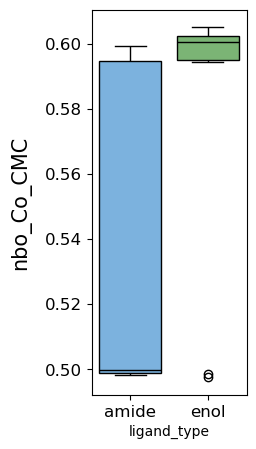

In [17]:
plt.figure(figsize=(2, 5))

sns.boxplot(x='ligand_type', y='nbo_Co_CMC', data=df_combined, palette=boxplot_palette, linewidth=1, **boxplot_props)

plt.ylabel('nbo_Co_CMC', fontsize=15, labelpad=10)
# plt.xlabel('ligand_type')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.savefig('bxplt_nbo_Co_CMC.png', dpi=300, bbox_inches='tight')

plt.show()

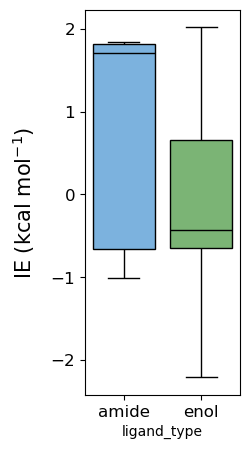

In [18]:
plt.figure(figsize=(2, 5))

sns.boxplot(x='ligand_type', y=df_combined['IE_CMC']*627.509, data=df_combined, palette=boxplot_palette, linewidth=1, **boxplot_props)

plt.ylabel(r'IE (kcal mol$^{-1}$)', fontsize=15, labelpad=10)
# plt.xlabel('ligand_type')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.savefig('bxplt_IE_CMC.png', dpi=300, bbox_inches='tight')

plt.show()

## Univariate analysis

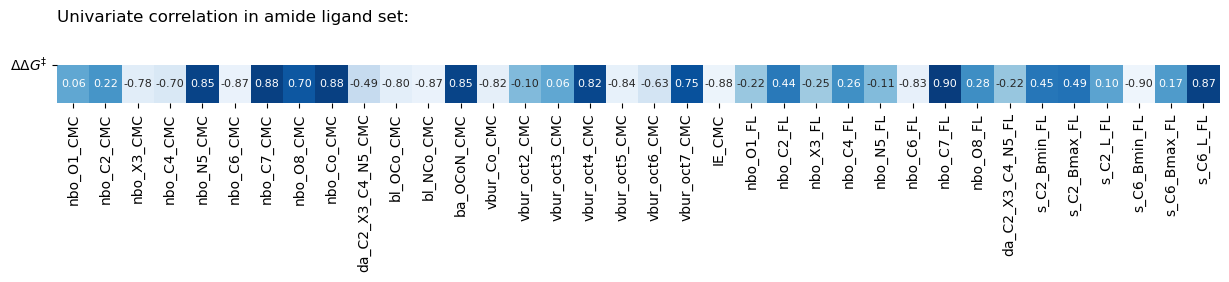

In [20]:
# Pearson correlation between 'exp_deldelG' and all the features
corr_AL_with_deldelG = df_AL[X_AL.columns].corrwith(df_AL['exp_deldelG'])

corr_df_AL = pd.DataFrame(corr_AL_with_deldelG, columns=['Correlation']).transpose()

plt.figure(figsize=(15, 0.5))
sns.heatmap(corr_df_AL, cmap="Blues", annot=True, cbar=False, vmin=-1, vmax=1, fmt=".2f", annot_kws={'size': 8})

plt.yticks([0], [r'$ΔΔG^{‡}$'], rotation=0)

plt.title(r'Univariate correlation in amide ligand set:'+ '\n'*2, loc='left')

# plt.savefig('corr_deldelG_AL.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

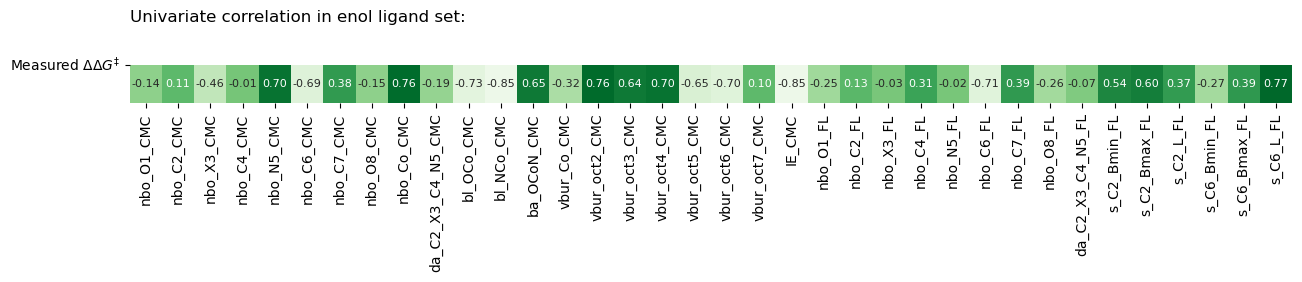

In [21]:
corr_EL_with_deldelG = df_EL[X_EL.columns].corrwith(df_EL['exp_deldelG'])

corr_df_EL = pd.DataFrame(corr_EL_with_deldelG, columns=['Correlation']).transpose()

plt.figure(figsize=(15, 0.5))
sns.heatmap(corr_df_EL, cmap="Greens", annot=True, cbar=False, vmin=-1, vmax=1, fmt=".2f", annot_kws={'size': 8})

plt.yticks([0], [r'Measured $ΔΔG^{‡}$'], rotation=0)

plt.title(r'Univariate correlation in enol ligand set:'+ '\n'*2, loc='left')

# plt.savefig('corr_deldelG_AL.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

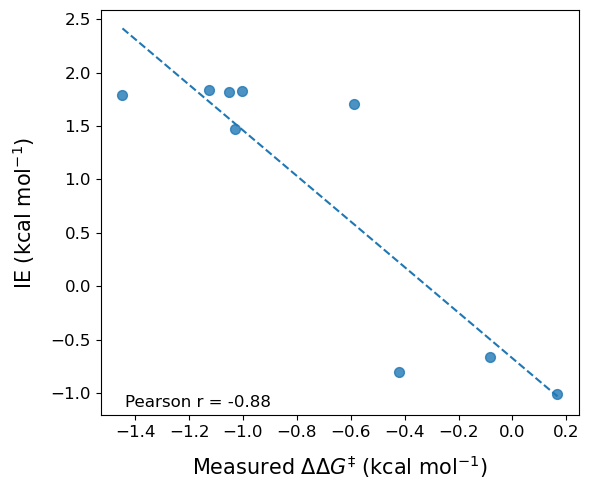

In [22]:
corr_value, _ = pearsonr(df_AL['exp_deldelG'], df_AL['IE_CMC'])

plt.figure(figsize=(6, 5))
sns.regplot(x='exp_deldelG', y=df_AL['IE_CMC']*627.509, data=df_AL, 
            scatter_kws={'s': 50}, line_kws={'lw': 1.5, "ls": "--"}, ci=None)

# plt.gca().invert_xaxis()

plt.text(0.05, 0.05, f'Pearson r = {corr_value:.2f}', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top')

plt.xlabel(r'Measured $ΔΔG^{‡}$ (kcal mol$^{-1}$)', fontsize=15, labelpad=10)
plt.ylabel(r'IE (kcal mol$^{-1}$)', fontsize=15, labelpad=10)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.tight_layout()
plt.savefig('IE_CMC_deldelG_corr_AL.png', dpi=300, bbox_inches='tight')
plt.show()

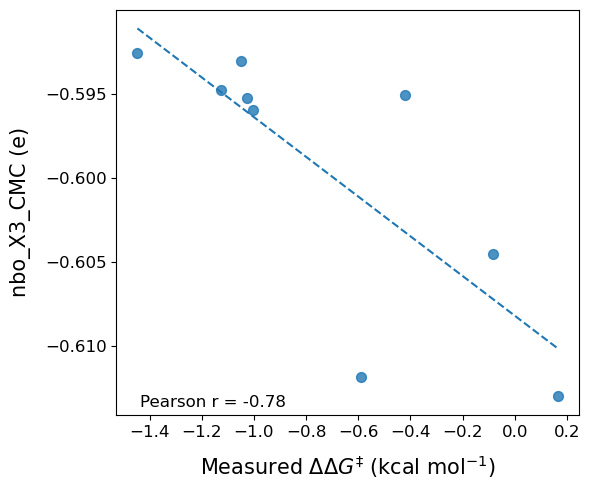

In [23]:
corr_value, _ = pearsonr(df_AL['exp_deldelG'], df_AL['nbo_X3_CMC'])

plt.figure(figsize=(6, 5))
sns.regplot(x='exp_deldelG', y=df_AL['nbo_X3_CMC'], data=df_AL, scatter_kws={'s': 50}, line_kws={'lw': 1.5, "ls": "--"}, ci=None)

# plt.gca().invert_xaxis()

plt.text(0.05, 0.05, f'Pearson r = {corr_value:.2f}', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top')

plt.xlabel(r'Measured $ΔΔG^{‡}$ (kcal mol$^{-1}$)', fontsize=15, labelpad=10)
plt.ylabel('nbo_X3_CMC (e)', fontsize=15, labelpad=10)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.tight_layout()
plt.savefig('nbo_X3_CMC_deldelG_corr_AL.png', dpi=300, bbox_inches='tight')
plt.show()

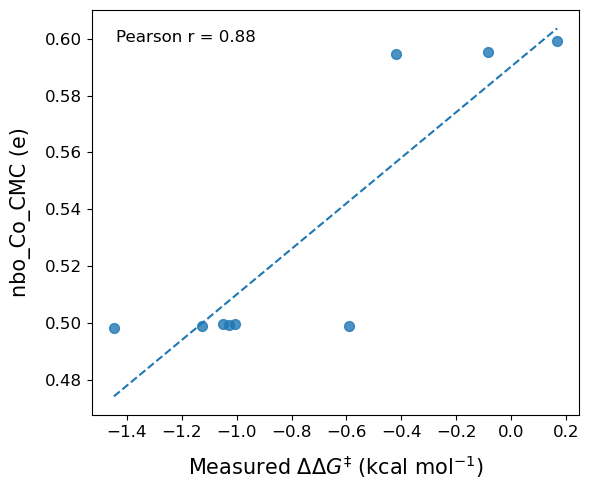

In [24]:
corr_value, _ = pearsonr(df_AL['exp_deldelG'], df_AL['nbo_Co_CMC'])

plt.figure(figsize=(6, 5))
sns.regplot(x='exp_deldelG', y=df_AL['nbo_Co_CMC'], data=df_AL, scatter_kws={'s': 50}, line_kws={'lw': 1.5, "ls": "--"}, ci=None)

# plt.gca().invert_xaxis()

plt.text(0.05, 0.95, f'Pearson r = {corr_value:.2f}', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top')

plt.xlabel(r'Measured $ΔΔG^{‡}$ (kcal mol$^{-1}$)', fontsize=15, labelpad=10)
plt.ylabel('nbo_Co_CMC (e)', fontsize=15, labelpad=10)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.tight_layout()
plt.savefig('nbo_Co_CMC_deldelG_corr_AL.png', dpi=300, bbox_inches='tight')
plt.show()

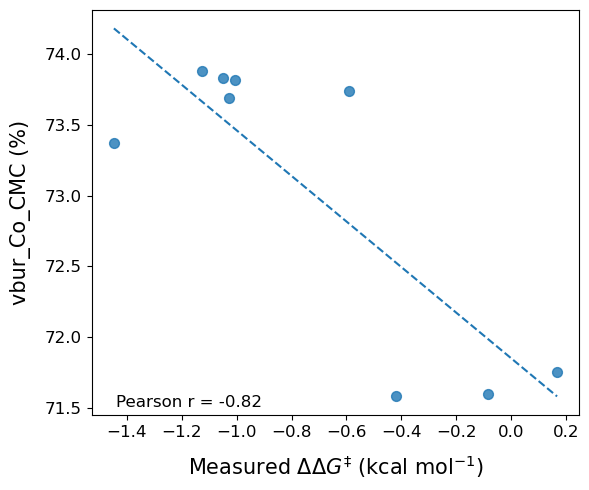

In [25]:
corr_value, _ = pearsonr(df_AL['exp_deldelG'], df_AL['vbur_Co_CMC'])

plt.figure(figsize=(6, 5))
sns.regplot(x='exp_deldelG', y=df_AL['vbur_Co_CMC'], data=df_AL, scatter_kws={'s': 50}, line_kws={'lw': 1.5, "ls": "--"}, ci=None)

# plt.gca().invert_xaxis()

plt.text(0.05, 0.05, f'Pearson r = {corr_value:.2f}', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top')

plt.xlabel(r'Measured $ΔΔG^{‡}$ (kcal mol$^{-1}$)', fontsize=15, labelpad=10)
plt.ylabel('vbur_Co_CMC (%)', fontsize=15, labelpad=10)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.tight_layout()
plt.savefig('vbur_Co_CMC_deldelG_corr_AL.png', dpi=300, bbox_inches='tight')
plt.show()

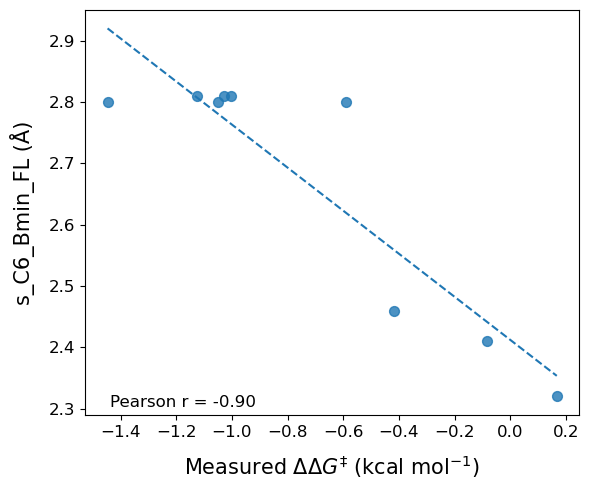

In [26]:
corr_value, _ = pearsonr(df_AL['exp_deldelG'], df_AL['s_C6_Bmin_FL'])

plt.figure(figsize=(6, 5))
sns.regplot(x='exp_deldelG', y=df_AL['s_C6_Bmin_FL'], data=df_AL, scatter_kws={'s': 50}, line_kws={'lw': 1.5, "ls": "--"}, ci=None)

# plt.gca().invert_xaxis()

plt.text(0.05, 0.05, f'Pearson r = {corr_value:.2f}', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top')

plt.xlabel(r'Measured $ΔΔG^{‡}$ (kcal mol$^{-1}$)', fontsize=15, labelpad=10)
plt.ylabel('s_C6_Bmin_FL (Å)', fontsize=15, labelpad=10)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.tight_layout()
plt.savefig('s_C6_Bmin_FL_deldelG_corr_AL.png', dpi=300, bbox_inches='tight')
plt.show()

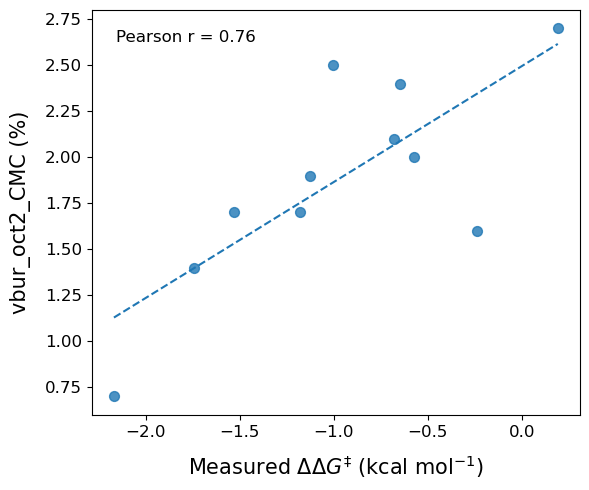

In [27]:
corr_value, _ = pearsonr(df_EL['exp_deldelG'], df_EL['vbur_oct2_CMC'])

plt.figure(figsize=(6, 5))
sns.regplot(x='exp_deldelG', y='vbur_oct2_CMC', data=df_EL, scatter_kws={'s': 50}, line_kws={'lw': 1.5, "ls": "--"}, ci=None)

# plt.gca().invert_xaxis()

plt.text(0.05, 0.95, f'Pearson r = {corr_value:.2f}', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top')

plt.xlabel(r'Measured $ΔΔG^{‡}$ (kcal mol$^{-1}$)', fontsize=15, labelpad=10)
plt.ylabel('vbur_oct2_CMC (%)', fontsize=15, labelpad=10)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.tight_layout()
plt.savefig('vbur_oct2_CMC_deldelG_corr_EL.png', dpi=300, bbox_inches='tight')
plt.show()

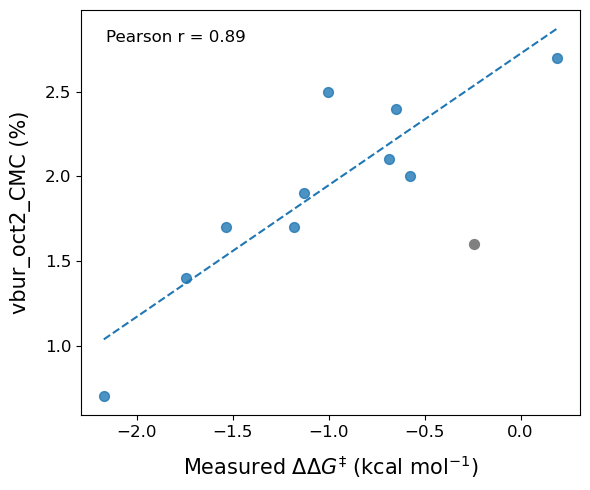

In [28]:
df_EL_exEL8 = df_EL[df_EL['ligand_entry'] != 'EL8']  # eclude EL8 for regression

corr_value, _ = pearsonr(df_EL_exEL8['exp_deldelG'], df_EL_exEL8['vbur_oct2_CMC'])

plt.figure(figsize=(6, 5))
sns.regplot(x='exp_deldelG', y='vbur_oct2_CMC', data=df_EL_exEL8, 
            scatter_kws={'s': 50}, line_kws={'lw': 1.5, "ls": "--"}, ci=None)

# plt.gca().invert_xaxis()

# adding EL8 back into the plot
lig_EL8 = df_EL[df_EL['ligand_entry'] == 'EL8']
plt.scatter(lig_EL8['exp_deldelG'], lig_EL8['vbur_oct2_CMC'], color='grey', s=50, label='EL8')

plt.text(0.05, 0.95, f'Pearson r = {corr_value:.2f}', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top')

plt.xlabel(r'Measured $ΔΔG^{‡}$ (kcal mol$^{-1}$)', fontsize=15, labelpad=10)
plt.ylabel('vbur_oct2_CMC (%)', fontsize=15, labelpad=10)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.tight_layout()
plt.savefig('vbur_oct2_CMC_deldelG_corr_EL2.png', dpi=300, bbox_inches='tight')
plt.show()

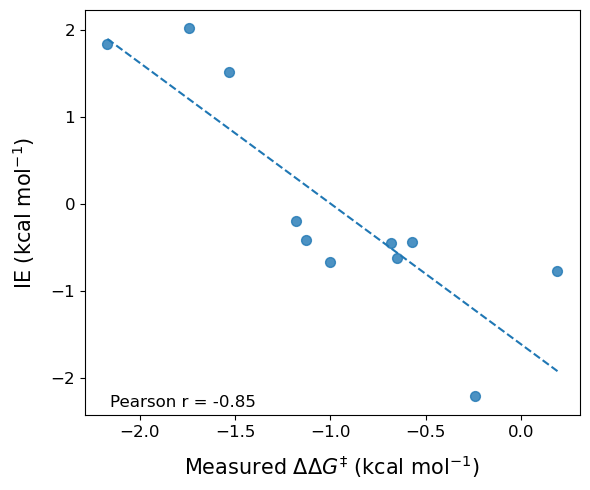

In [29]:
corr_value, _ = pearsonr(df_EL['exp_deldelG'], df_EL['IE_CMC'])

plt.figure(figsize=(6, 5))
sns.regplot(x='exp_deldelG', y=df_EL['IE_CMC']*627.509, data=df_EL, 
            scatter_kws={'s': 50}, line_kws={'lw': 1.5, "ls": "--"}, ci=None)

# plt.gca().invert_xaxis()

plt.text(0.05, 0.05, f'Pearson r = {corr_value:.2f}', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top')

plt.xlabel(r'Measured $ΔΔG^{‡}$ (kcal mol$^{-1}$)', fontsize=15, labelpad=10)
plt.ylabel(r'IE (kcal mol$^{-1}$)', fontsize=15, labelpad=10)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.tight_layout()
plt.savefig('vbur_IE_CMC_deldelG_corr_EL.png', dpi=300, bbox_inches='tight')
plt.show()

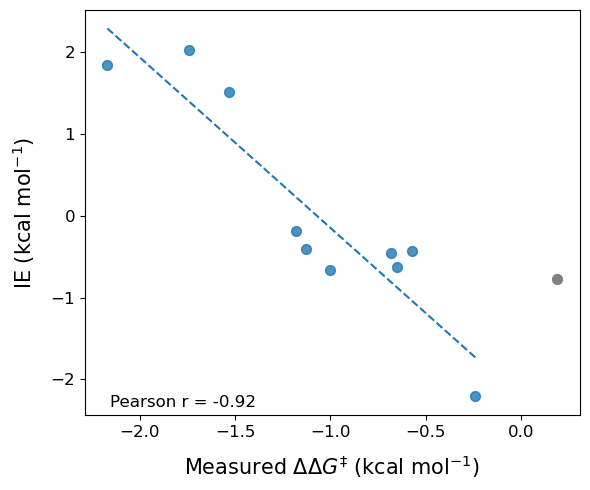

In [30]:
df_EL_exEL3 = df_EL[df_EL['ligand_entry'] != 'EL3']  # exclude EL3 for regression

corr_value, _ = pearsonr(df_EL_exEL3['exp_deldelG'], df_EL_exEL3['IE_CMC'])

plt.figure(figsize=(6, 5))
sns.regplot(x='exp_deldelG', y=df_EL_exEL3['IE_CMC'] * 627.509, data=df_EL_exEL3, 
            scatter_kws={'s': 50}, line_kws={'lw': 1.5, "ls": "--"}, ci=None)

# adding EL3 back
lig_EL3 = df_EL[df_EL['ligand_entry'] == 'EL3']
plt.scatter(lig_EL3['exp_deldelG'], lig_EL3['IE_CMC'] * 627.509, color='grey', s=50, label='EL3')

plt.text(0.05, 0.05, f'Pearson r = {corr_value:.2f}', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top')

plt.xlabel(r'Measured $ΔΔG^{‡}$ (kcal mol$^{-1}$)', fontsize=15, labelpad=10)
plt.ylabel(r'IE (kcal mol$^{-1}$)', fontsize=15, labelpad=10)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.tight_layout()
plt.savefig('vbur_IE_CMC_deldelG_corr_EL2.png', dpi=300, bbox_inches='tight')
plt.show()